## Position vs Lap

In [32]:
import fastf1.plotting

from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [33]:
session_2018 = fastf1.get_session(2018, 1, 'R')
session_2018.load()
session_2019 = fastf1.get_session(2019, 1, 'R')
session_2019.load()
session_2020 = fastf1.get_session(2020, 1, 'R')
session_2020.load()
session_2021 = fastf1.get_session(2021, 1, 'R')
session_2021.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
logger      WARNING 	Failed to load telemetry data!
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['5', '44', '7', '3', '14', '33', '27', '77', '2', '55', '11', '31', '16', '18', '28', '8', '20', '10', '9', '35']
core    

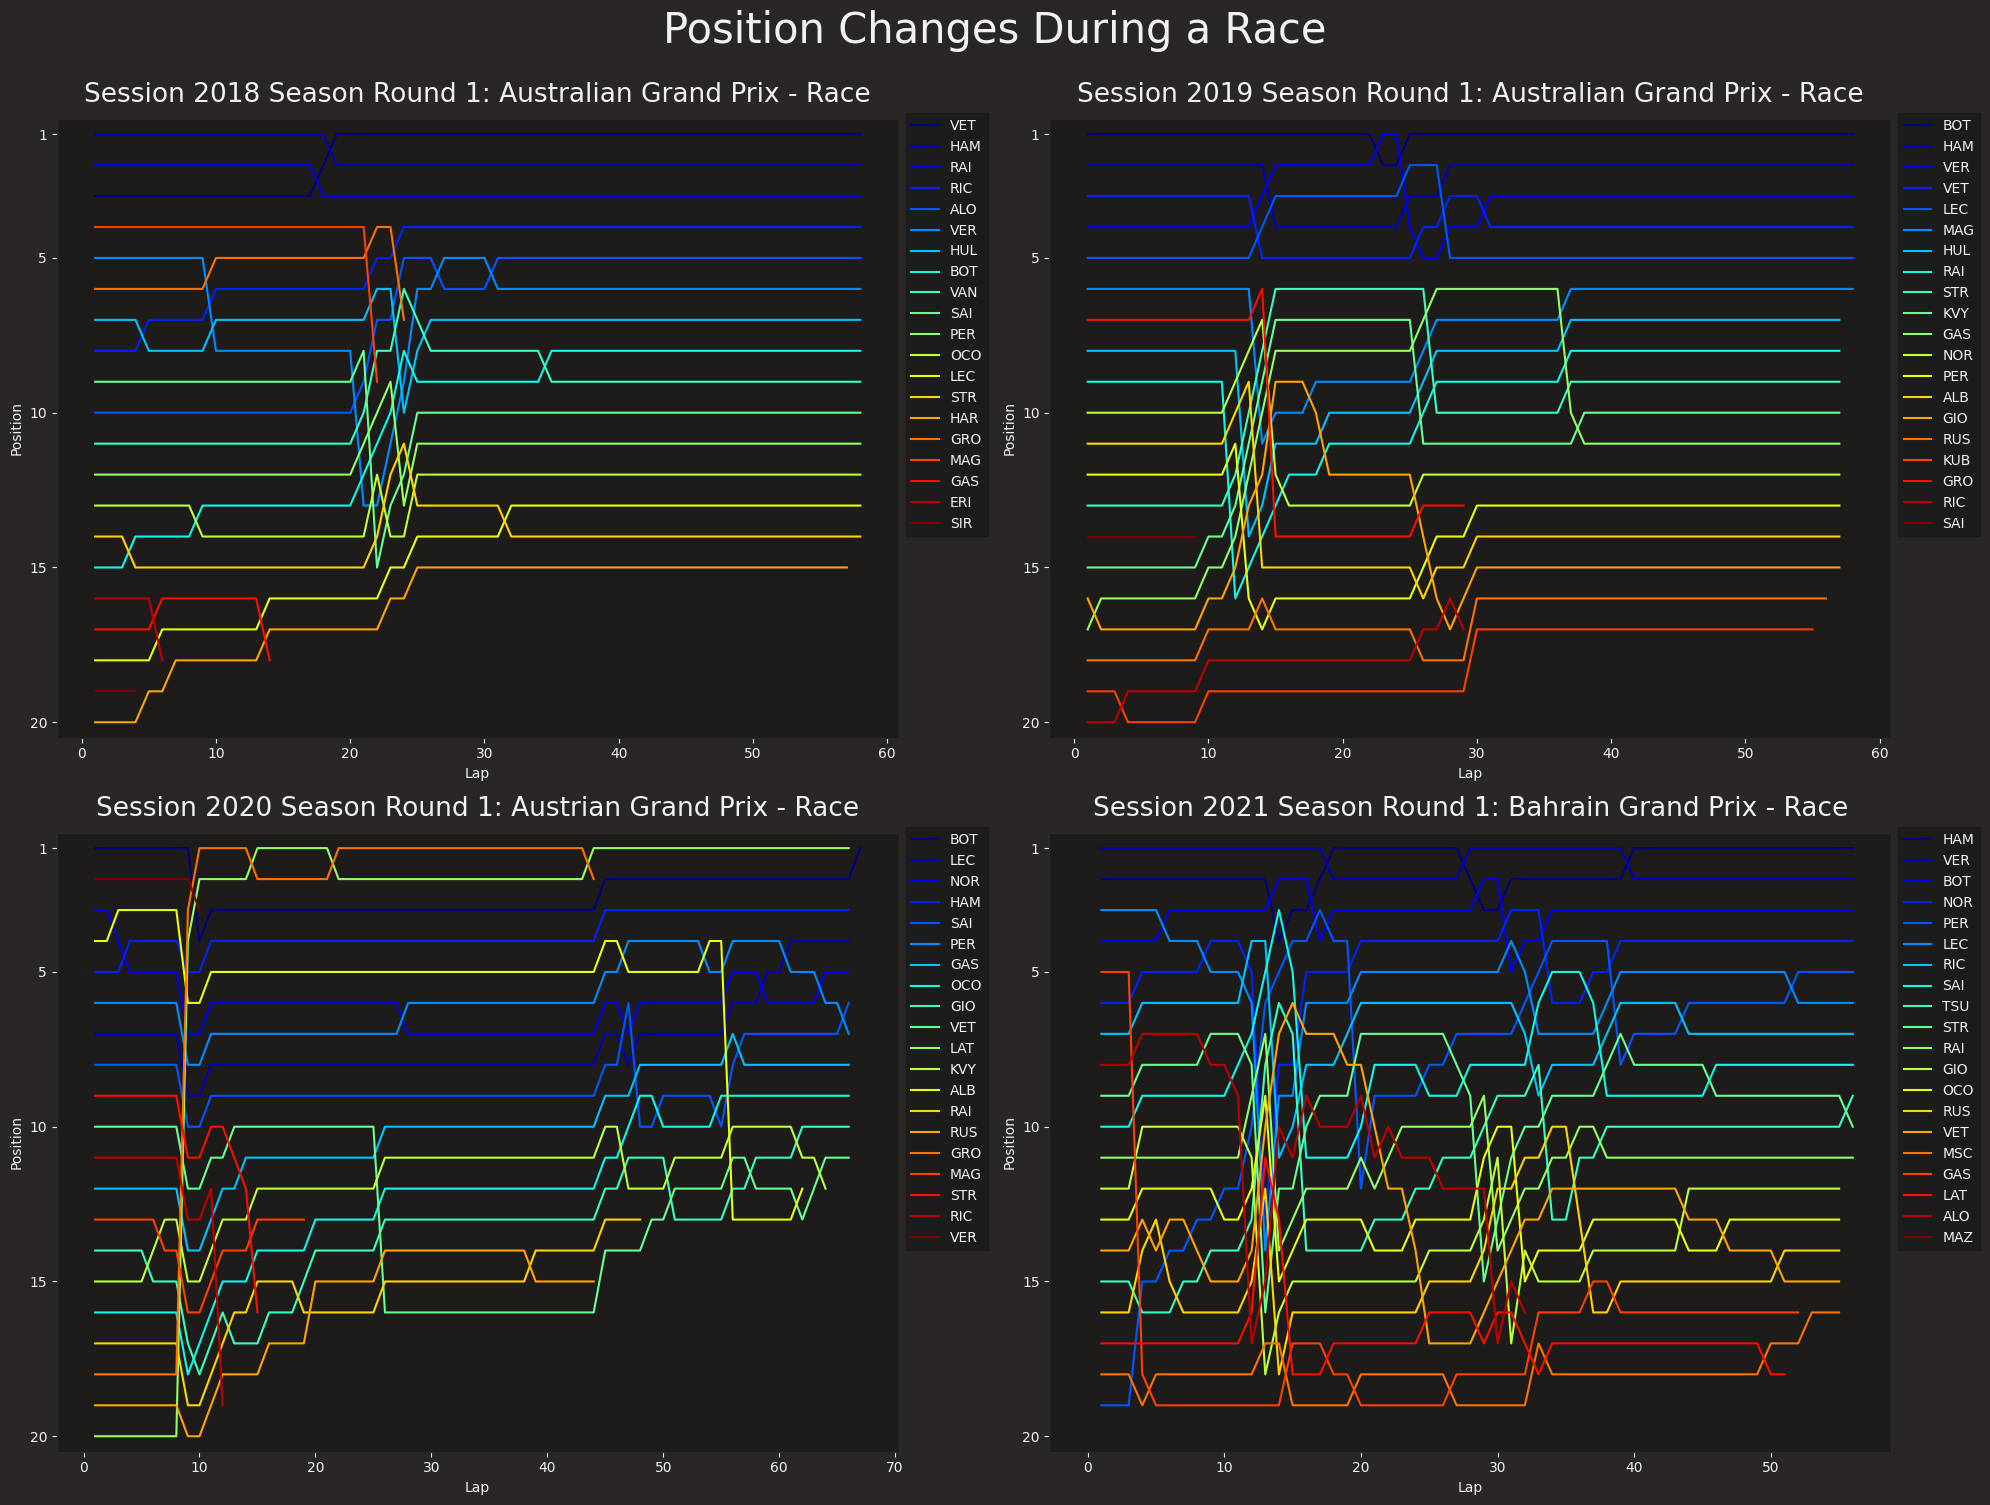

In [46]:
import fastf1.plotting
import matplotlib.pyplot as plt

# Assuming you have a list of four session objects: sessions = [session1, session2, session3, session4]
sessions = [session1, session2, session3, session4]

# Create a colormap with the maximum number of drivers across all sessions
max_drivers = max(len(session.drivers) for session in sessions)
cmap = plt.cm.get_cmap('jet', max_drivers)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for session_idx, session in enumerate(sessions):
    row_idx = session_idx // 2
    col_idx = session_idx % 2
    ax = axes[row_idx, col_idx]

    drivers = session.drivers

    for i, drv in enumerate(drivers):
        drv_laps = session.laps.pick_driver(drv)
        abb = drv_laps['Driver'].iloc[0]
        color = cmap(i % max_drivers)  # Get the color for the current driver

        ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
                label=abb, color=color)

    ax.set_ylim([20.5, 0.5])
    ax.set_yticks([1, 5, 10, 15, 20])
    ax.set_xlabel('Lap')
    ax.set_ylabel('Position')

    ax.legend(bbox_to_anchor=(1.0, 1.02))
    ax.set_title(f'Session {session}')  # Add title with session number

# Add a title for the entire grid
fig.suptitle('Position Changes During a Race', fontsize=30, y=1)

plt.tight_layout()
plt.show()


In [67]:
fastest_lap = laps_r.pick_fastest()
print('Fastest lap: ',fastest_lap['LapTime'])
print('Tire compound: ',fastest_lap['Compound'])
print('Driver: ',fastest_lap['Driver'])

Fastest lap:  0 days 00:01:25.945000
Tire compound:  SOFT
Driver:  RIC


In [73]:
event_laps = session_2018.laps

In [74]:
event_laps

Time Driver DriverNumber                LapTime  \
0   0 days 00:08:53.241000    GAS           10 0 days 00:01:45.060000   
1   0 days 00:10:26.613000    GAS           10 0 days 00:01:33.372000   
2   0 days 00:11:59.474000    GAS           10 0 days 00:01:32.861000   
3   0 days 00:13:31.658000    GAS           10 0 days 00:01:32.184000   
4   0 days 00:15:03.990000    GAS           10 0 days 00:01:32.332000   
..                     ...    ...          ...                    ...   
935 0 days 00:10:26.032000    ERI            9 0 days 00:01:33.177000   
936 0 days 00:11:58.778000    ERI            9 0 days 00:01:32.746000   
937 0 days 00:13:30.988000    ERI            9 0 days 00:01:32.210000   
938 0 days 00:15:03.277000    ERI            9 0 days 00:01:32.289000   
939 0 days 00:16:49.601000    ERI            9                    NaT   

     LapNumber  Stint             PitOutTime              PitInTime  \
0          1.0    NaN 0 days 00:00:04.103000                    NaT   
1          2.0    1.0                    NaT                    NaT   
2          3.0    1.0                    NaT                    NaT   
3          4.0    1.0                    NaT                    NaT   
4          5.0    1.0                    NaT                    NaT   
..         ...    ...                    ...                    ...   
935        2.0    1.0                    NaT                    NaT   
936        3.0    1.0                    NaT                    NaT   
937        4.0    1.0                    NaT                    NaT   
938        5.0    1.0                    NaT                    NaT   
939        6.0    1.0                    NaT 0 days 00:16:49.622000   

               Sector1Time            Sector2Time  ...        Team  \
0                      NaT 0 days 00:00:25.495000  ...  Toro Rosso   
1   0 days 00:00:31.357000 0 days 00:00:24.825000  ...  Toro Rosso   
2   0 days 00:00:31.160000 0 days 00:00:24.725000  ...  Toro Rosso   
3   0 days 00:00:30.835000 0 days 00:00:24.730000  ...  Toro Rosso   
4   0 days 00:00:30.716000 0 days 00:00:24.821000  ...  Toro Rosso   
..                     ...                    ...  ...         ...   
935 0 days 00:00:31.039000 0 days 00:00:24.734000  ...      Sauber   
936 0 days 00:00:31.083000 0 days 00:00:24.646000  ...      Sauber   
937 0 days 00:00:30.666000 0 days 00:00:24.561000  ...      Sauber   
938 0 days 00:00:30.732000 0 days 00:00:24.546000  ...      Sauber   
939 0 days 00:00:30.840000 0 days 00:00:24.446000  ...      Sauber   

              LapStartTime LapStartDate TrackStatus  Position  Deleted  \
0   0 days 00:07:07.988000          NaT           1      17.0    False   
1   0 days 00:08:53.241000          NaT           1      17.0    False   
2   0 days 00:10:26.613000          NaT           1      17.0    False   
3   0 days 00:11:59.474000          NaT           1      17.0    False   
4   0 days 00:13:31.658000          NaT           2      17.0    False   
..                     ...          ...         ...       ...      ...   
935 0 days 00:08:52.855000          NaT           1      16.0    False   
936 0 days 00:10:26.032000          NaT           1      16.0    False   
937 0 days 00:11:58.778000          NaT           1      16.0    False   
938 0 days 00:13:30.988000          NaT           2      16.0    False   
939 0 days 00:15:03.277000          NaT           2      18.0    False   

     DeletedReason  FastF1Generated IsAccurate Overtake  
0                             False      False        0  
1                             False       True        0  
2                             False       True        0  
3                             False       True        0  
4                             False       True        0  
..             ...              ...        ...      ...  
935                           False       True        0  
936                           False       True        0  
937                           False     

In [75]:
shifts = []
name = []
year = []
location = []
drivers = []
ses = []
for b in range (2018, 2023):
    for i in range(1, 25):
        try:
            for sess in ['FP1', 'FP2', 'FP3', 'Q', 'R']:
                session = ff1.get_session(b, i, sess)
                weekend = session.event.EventName

                if weekend == 'Singapore Grand Prix':
                    session.load()
                    for driver in session.drivers:
                        lap = session.laps.pick_driver(driver).pick_fastest()
                        df = lap.telemetry
                        df['total_shifts'] = abs(df['nGear'].diff())
                        s = df['total_shifts'].sum()
                        shifts.append(s)
                        name.append(session.event['EventName'])
                        year.append(session.event.year)
                        location.append(session.event.Location)
                        drivers.append(driver)
                        ses.append(sess)
                else:
                    pass
        except:
            pass

core           INFO 	Loading data for Singapore Grand Prix - Practice 1 [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['10', '11', '14', '16', '18', '2', '20', '27', '28', '3', '31', '33', '35', '44', '5', '55', '7', '77', '8', '9']
/Users/nayanalawrence/Library/Python/3.9/lib/python/site-packages/fastf1/core.py:350: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the val

In [78]:
import pandas as pd
df = pd.DataFrame(list(zip(name, location, year, ses, drivers, shifts)), columns =['Round', 'Race','Year','Session', 'Driver','#_shifts'])

In [79]:
df

Round        Race  Year Session Driver  #_shifts
0    Singapore Grand Prix   Singapore  2018     FP1     10      52.0
1    Singapore Grand Prix   Singapore  2018     FP1     11      67.0
2    Singapore Grand Prix   Singapore  2018     FP1     14      84.0
3    Singapore Grand Prix   Singapore  2018     FP1     16      68.0
4    Singapore Grand Prix   Singapore  2018     FP1     18      54.0
..                    ...         ...   ...     ...    ...       ...
240  Singapore Grand Prix  Marina Bay  2022       R     31      54.0
241  Singapore Grand Prix  Marina Bay  2022       R     23      50.0
242  Singapore Grand Prix  Marina Bay  2022       R     14      64.0
243  Singapore Grand Prix  Marina Bay  2022       R      6      56.0
244  Singapore Grand Prix  Marina Bay  2022       R     24      58.0

[245 rows x 6 columns]

In [85]:
session_2018.laps.get_weather_data()

Time AirTemp Humidity Pressure Rainfall TrackTemp  \
7  0 days 00:07:57.159000    24.2     36.3    997.0    False      38.9   
8  0 days 00:08:58.221000    24.2     36.3    996.9    False      38.2   
10 0 days 00:10:57.202000    23.9     36.5    997.1    False      36.7   
12 0 days 00:12:57.484000    23.8     35.7    997.1    False      36.6   
13 0 days 00:13:57.637000    23.5     36.3    997.2    False      36.4   
..                    ...     ...      ...      ...      ...       ...   
8  0 days 00:08:58.221000    24.2     36.3    996.9    False      38.2   
10 0 days 00:10:57.202000    23.9     36.5    997.1    False      36.7   
12 0 days 00:12:57.484000    23.8     35.7    997.1    False      36.6   
13 0 days 00:13:57.637000    23.5     36.3    997.2    False      36.4   
15 0 days 00:15:57.740000    23.5     36.6    997.0    False      36.2   

   WindDirection WindSpeed  
7            307       4.1  
8            296       3.8  
10           289       4.3  
12           210       2.7  
13           267       2.5  
..           ...       ...  
8            296       3.8  
10           289       4.3  
12           210       2.7  
13           267       2.5  
15           295       3.5  

[940 rows x 8 columns]

## Lap time vs number vs tyre

In [90]:
session_2018.laps.pick_tyre

<bound method Laps.pick_tyre of                       Time Driver DriverNumber                LapTime  \
0   0 days 00:08:53.241000    GAS           10 0 days 00:01:45.060000   
1   0 days 00:10:26.613000    GAS           10 0 days 00:01:33.372000   
2   0 days 00:11:59.474000    GAS           10 0 days 00:01:32.861000   
3   0 days 00:13:31.658000    GAS           10 0 days 00:01:32.184000   
4   0 days 00:15:03.990000    GAS           10 0 days 00:01:32.332000   
..                     ...    ...          ...                    ...   
935 0 days 00:10:26.032000    ERI            9 0 days 00:01:33.177000   
936 0 days 00:11:58.778000    ERI            9 0 days 00:01:32.746000   
937 0 days 00:13:30.988000    ERI            9 0 days 00:01:32.210000   
938 0 days 00:15:03.277000    ERI            9 0 days 00:01:32.289000   
939 0 days 00:16:49.601000    ERI            9                    NaT   

     LapNumber  Stint             PitOutTime              PitInTime  \
0          1.0    Na

In [91]:
session_2018.weather_data

Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0   0 days 00:00:57.060000     24.1      36.2     997.1     False       38.2   
1   0 days 00:01:57.078000     24.0      36.3     997.1     False       38.6   
2   0 days 00:02:57.090000     24.0      36.3     997.1     False       38.6   
3   0 days 00:03:57.106000     23.9      37.2     997.0     False       38.7   
4   0 days 00:04:57.121000     24.2      35.8     997.1     False       38.7   
..                     ...      ...       ...       ...       ...        ...   
106 0 days 01:46:58.510000     24.3      30.4     997.2      True       32.7   
107 0 days 01:47:58.588000     24.3      30.9     997.2      True       32.6   
108 0 days 01:48:58.779000     24.3      30.9     997.2      True       32.6   
109 0 days 01:49:58.545000     24.3      30.9     997.2      True       32.6   
110 0 days 01:50:58.556000     24.3      30.9     997.2      True       32.6   

     WindDirection  WindSpeed  
0              294        3.0  
1              273        1.4  
2              273        1.4  
3              287        2.3  
4              309        3.5  
..             ...        ...  
106            311        3.7  
107            278        4.2  
108            278        4.2  
109            278        4.2  
110            278        4.2  

[111 rows x 8 columns]

In [122]:
race = fastf1.get_session(2018, 1, 'R')
race.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
logger      WARNING 	Failed to load telemetry data!
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['5', '44', '7', '3', '14', '33', '27', '77', '2', '55', '11', '31', '16', '18', '28', '8', '20', '10', '9', '35']


In [123]:
driver_laps = race.laps.pick_driver("ALO").pick_quicklaps().reset_index()

<AxesSubplot: xlabel='LapNumber', ylabel='LapTime'>

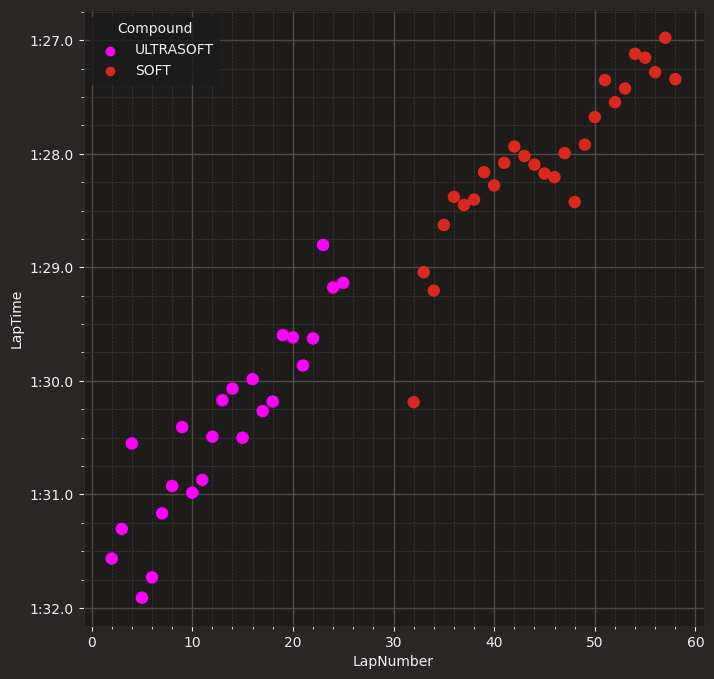

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'ULTRASOFT' key and color value to the palette dictionary
#fastf1.plotting.COMPOUND_COLORS['ULTRASOFT'] = '#FF00FF'

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,x="LapNumber",y="LapTime",ax=ax,hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS, s=80,
                linewidth=0,
                legend='auto')


In [111]:
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.0.6]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been writ

In [112]:
driver_laps = race.laps.pick_driver("ALO").pick_quicklaps().reset_index()

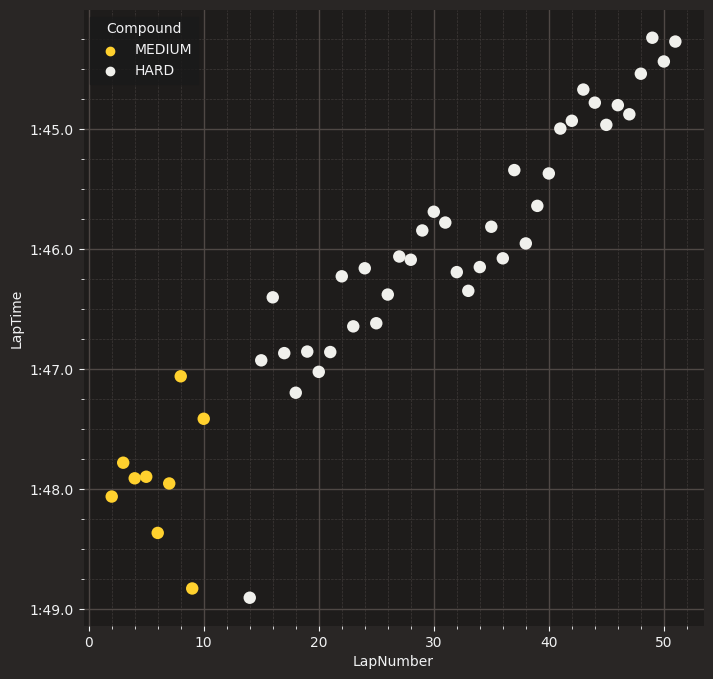

In [115]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

sns.despine(left=True, bottom=True)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '4', '11', '16', '3', '55', '22', '18', '7', '99', '31', '63', '5', '47', '10', '6', '14', '9']
/var/folders/y5/7_y6flvn4259w_z_shzgvck00000gn/T/ipykernel_38817/3477131200.py:14: FutureWarning: The default value of numeric_onl

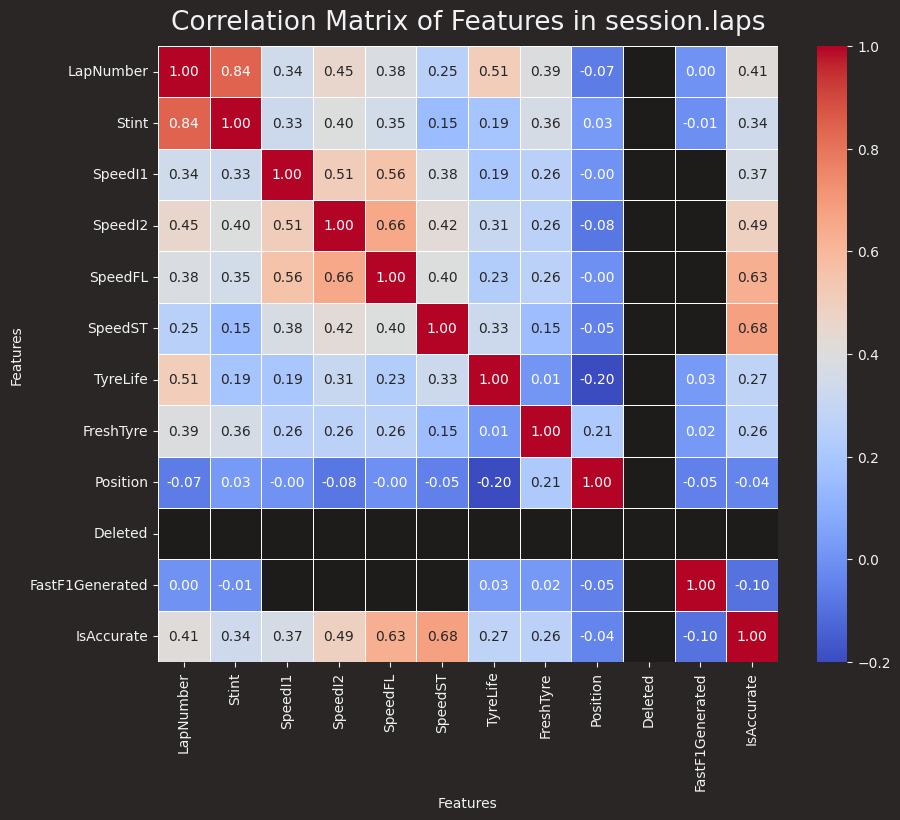

In [119]:
import fastf1 as ff1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the session data
session = ff1.get_session(2021, 1, 'R')
session.load()

# Extract the laps data
laps = session.laps

# Compute the correlation matrix
correlation_matrix = laps.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Set the title and axis labels
plt.title('Correlation Matrix of Features in session.laps')
plt.xlabel('Features')
plt.ylabel('Features')

# Display the heatmap
plt.show()


In [2]:
race = ff1.get_session(2021, 'Zandvoort', 'R')

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /Users/nayanalawrence/Library/Caches/fastf1.
	Size: 987.56 MB


In [5]:
race.load()
laps= race.laps

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '77', '10', '16', '14', '55', '11', '31', '4', '3', '18', '5', '99', '88', '6', '63', '47', '22', '9']


In [6]:
# Get laps of the drivers (BOT and HAM)
laps_bot = laps.pick_driver('BOT')
laps_ham = laps.pick_driver('HAM')
# Extract the fastest laps
fastest_bot = laps_bot.pick_fastest()
fastest_ham = laps_ham.pick_fastest()

In [7]:
# Get telemetry from fastest laps
telemetry_bot = fastest_bot.get_car_data().add_distance()
telemetry_ham = fastest_ham.get_car_data().add_distance()

/Users/nayanalawrence/Library/Python/3.9/lib/python/site-packages/fastf1/core.py:350: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
/Users/nayanalawrence/Library/Python/3.9/lib/python/site-packages/fastf1/core.py:350: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time


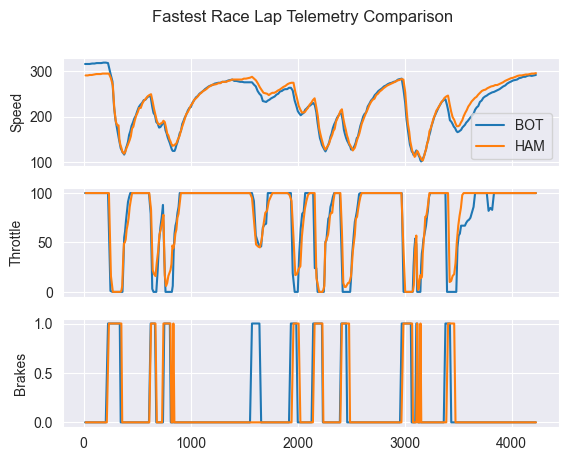

In [9]:
fig, ax = plt.subplots(3)
fig.suptitle("Fastest Race Lap Telemetry Comparison")
ax[0].plot(telemetry_bot['Distance'], telemetry_bot['Speed'], label='BOT')
ax[0].plot(telemetry_ham['Distance'], telemetry_ham['Speed'], label='HAM')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")
ax[1].plot(telemetry_bot['Distance'], telemetry_bot['Throttle'], label='BOT')
ax[1].plot(telemetry_ham['Distance'], telemetry_ham['Throttle'], label='HAM')
ax[1].set(ylabel='Throttle')
ax[2].plot(telemetry_bot['Distance'], telemetry_bot['Brake'], label='BOT')
ax[2].plot(telemetry_ham['Distance'], telemetry_ham['Brake'], label='HAM')
ax[2].set(ylabel='Brakes')

for a in ax.flat:
    a.label_outer()

plt.show()

In [125]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta

import fastf1
import fastf1.plotting
from fastf1.core import Laps


# we only want support for timedelta plotting in this example
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

session = fastf1.get_session(2018, 'Monza', 'R')
session.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Italian Grand Prix - Race [v3.0.6]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api  

In [126]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

['GAS' 'PER' 'ALO' 'LEC' 'STR' 'VAN' 'MAG' 'HUL' 'HAR' 'RIC' 'OCO' 'VER'
 'SIR' 'HAM' 'VET' 'SAI' 'RAI' 'BOT' 'GRO' 'ERI']


In [127]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [128]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [129]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     HAM 0 days 00:01:22.497000        0 days 00:00:00
1     VET 0 days 00:01:22.505000 0 days 00:00:00.008000
2     BOT 0 days 00:01:22.907000 0 days 00:00:00.410000
3     RAI 0 days 00:01:23.515000 0 days 00:00:01.018000
4     PER 0 days 00:01:23.529000 0 days 00:00:01.032000
5     VER 0 days 00:01:23.609000 0 days 00:00:01.112000
6     ERI 0 days 00:01:23.768000 0 days 00:00:01.271000
7     SIR 0 days 00:01:23.768000 0 days 00:00:01.271000
8     SAI 0 days 00:01:24.056000 0 days 00:00:01.559000
9     HUL 0 days 00:01:24.059000 0 days 00:00:01.562000
10    OCO 0 days 00:01:24.179000 0 days 00:00:01.682000
11    GRO 0 days 00:01:24.243000 0 days 00:00:01.746000
12    LEC 0 days 00:01:24.504000 0 days 00:00:02.007000
13    STR 0 days 00:01:24.580000 0 days 00:00:02.083000
14    GAS 0 days 00:01:24.767000 0 days 00:00:02.270000
15    VAN 0 days 00:01:24.772000 0 days 00:00:02.275000
16    RIC 0 days 00:01:25.229000 0 days 00:00:02

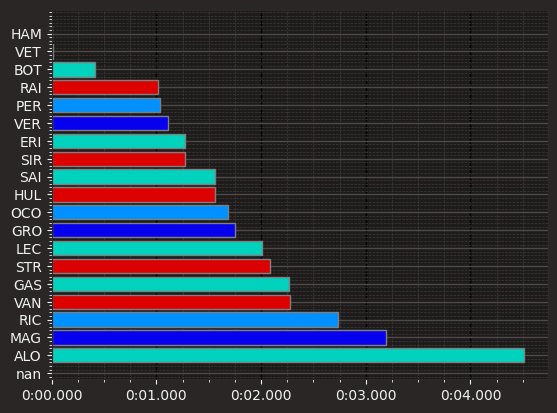

In [131]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)